In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift
from scipy.signal import butter, lfilter, filtfilt, freqz

### Basic Sinusoidal Signal

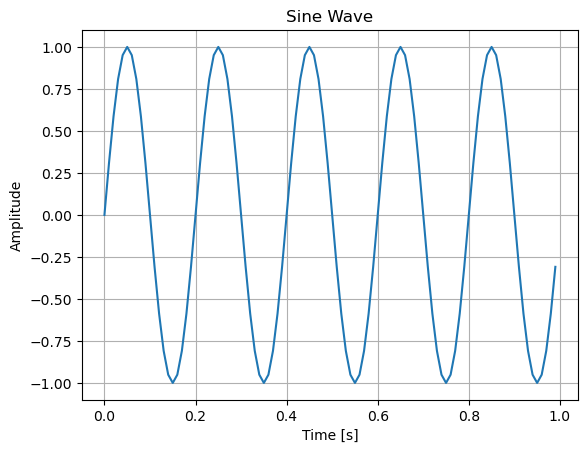

In [16]:
fs = 100  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f = 5  # Frequency of the sine wave
x = np.sin(2 * np.pi * f * t)  # Sinusoidal signal

plt.plot(t, x)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sine Wave')
plt.grid(True)
plt.show()


### Fourier Transform

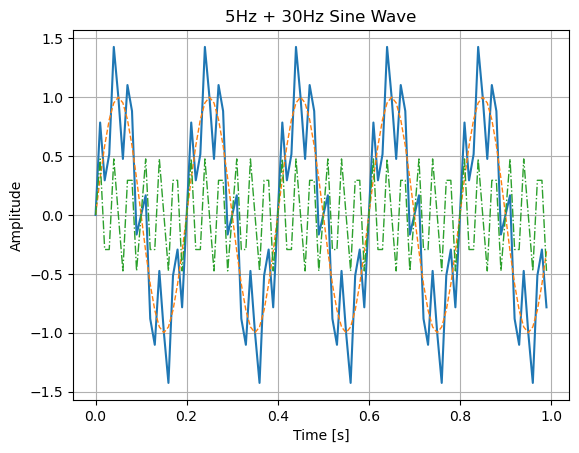

/var/folders/gc/lpnp82h92tv35c_7v97w97cm0000gn/T/ipykernel_42466/1887783249.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freqs, np.abs(X), use_line_collection=True)


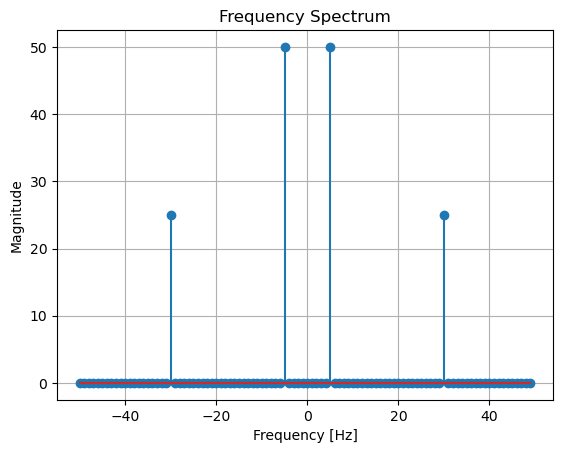

In [26]:
f1, f2 = 5, 30
x1 = np.sin(2 * np.pi * f1 * t)
x2 = 0.5 * np.sin(2 * np.pi * f2 * t)
x_comp = x1 + x2

X = fft(x_comp)
freqs = np.fft.fftfreq(len(X), 1/fs)

plt.plot(t, x_comp)
plt.plot(t, x1, '--', linewidth=1)
plt.plot(t, x2, '-.', linewidth=1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('5Hz + 30Hz Sine Wave')
plt.grid(True)
plt.show()

plt.stem(freqs, np.abs(X), use_line_collection=True)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

- TODO: Implement Fourier Transform of a box function


### Filtering

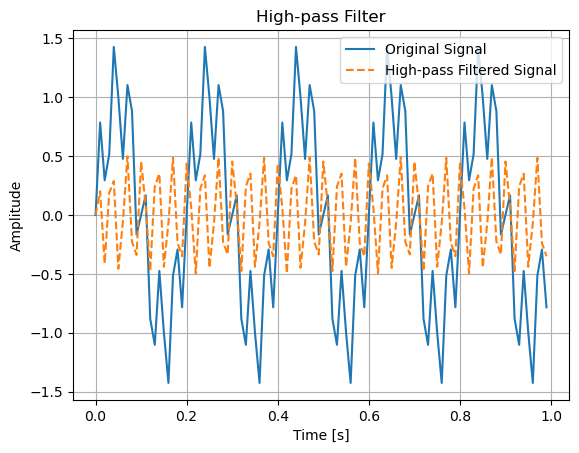

In [29]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

cutoff_high = 20  # Desired cutoff frequency for high-pass filter
x_highpass = butter_highpass_filter(x_comp, cutoff_high, fs, order=3)

plt.plot(t, x_comp, label='Original Signal')
plt.plot(t, x_highpass, label='High-pass Filtered Signal', linestyle='dashed')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('High-pass Filter')
plt.legend()
plt.grid(True)
plt.show()

- TODO: Implement a low-pass filter

In [28]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# cutoff = 10  # Desired cutoff frequency

What problem do you notice with the low-pass filter? How can you fix it?

### Phase Shift

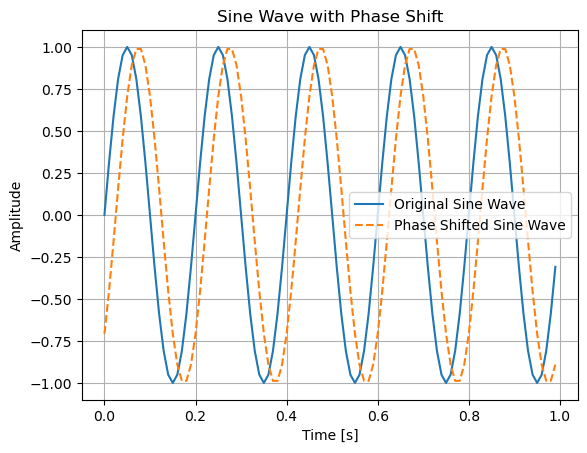

In [37]:
f = 5
x = np.sin(2 * np.pi * f * t)  

phase_shift_rad = - np.pi/4  # 45 degree phase shift
x_shifted = np.sin(2 * np.pi * f * t + phase_shift_rad)

plt.plot(t, x, label='Original Sine Wave')
plt.plot(t, x_shifted, label='Phase Shifted Sine Wave', linestyle='dashed')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Sine Wave with Phase Shift')
plt.legend()
plt.grid(True)
plt.show()

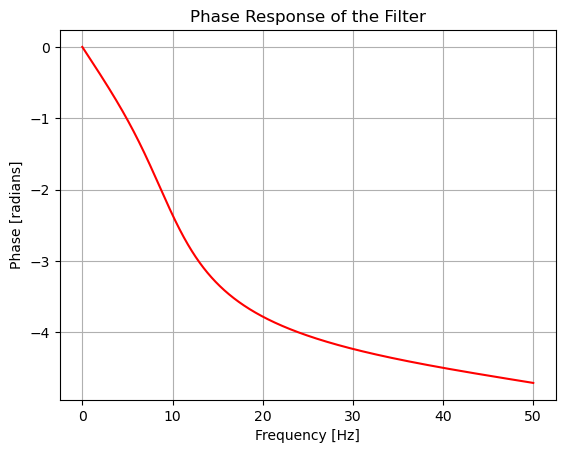

In [32]:
# Compute the frequency response of the filter
b, a = butter_lowpass(cutoff, fs, order=3)
w, h = freqz(b, a, worN=8000)


# Plot the phase response of the filter
plt.figure()
plt.plot(0.5*fs*w/np.pi, np.unwrap(np.angle(h)), 'r')
plt.title('Phase Response of the Filter')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()
plt.show()

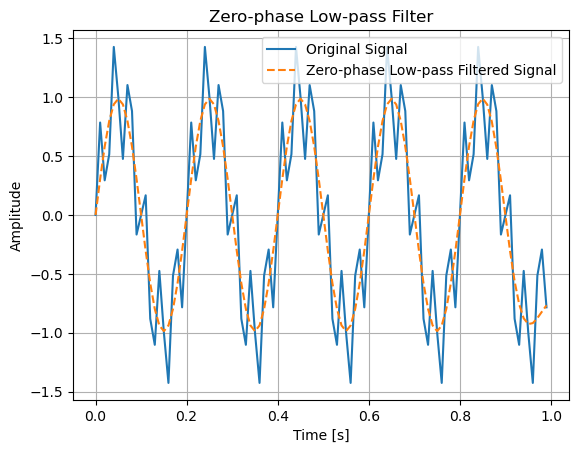

In [35]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def zero_phase_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)  # Apply the filter forwards and then backwards
    return y

cutoff = 10  # Desired cutoff frequency
x_filtered_zero_phase = zero_phase_lowpass_filter(x_comp, cutoff, fs, order=3)

plt.plot(t, x_comp, label='Original Signal')
plt.plot(t, x_filtered_zero_phase, label='Zero-phase Low-pass Filtered Signal', linestyle='dashed')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Zero-phase Low-pass Filter')
plt.legend()
plt.grid(True)
plt.show()

### Convolution

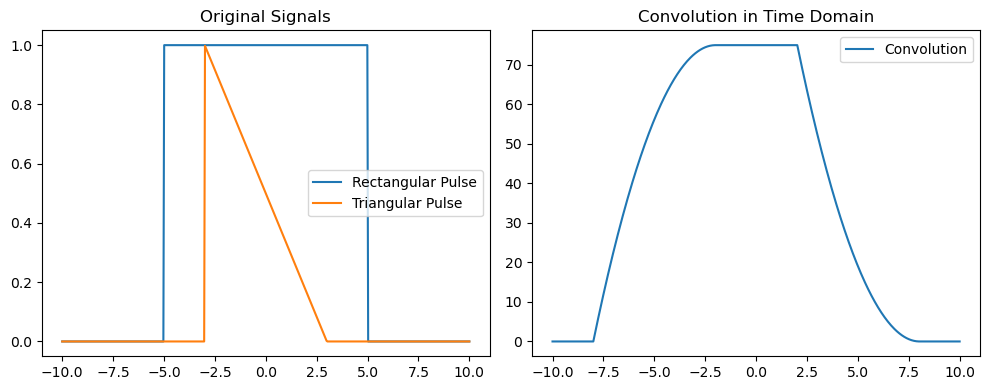

In [90]:
# Generate signals
t = np.linspace(-10, 10, 500)
rectangular_pulse = np.where((t >= -5) & (t <= 5), 1, 0)
triangular_pulse = np.where(t < -3, 0, 0.5 - t/6)
triangular_pulse = np.where(np.abs(t) <= 3, triangular_pulse, 0)

# Convolve in time domain
convolved_time = np.convolve(rectangular_pulse, triangular_pulse, 'same')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, rectangular_pulse, label='Rectangular Pulse')
plt.plot(t, triangular_pulse, label='Triangular Pulse')
plt.legend()
plt.title('Original Signals')

plt.subplot(1, 2, 2)
plt.plot(t, convolved_time, label='Convolution')
plt.legend()
plt.title('Convolution in Time Domain')

plt.tight_layout()
plt.show()


- TODO: Add convolution in frequency domain

In [88]:
# Compute FFTs of the signals
F_rect = fft(rectangular_pulse)
F_tri = fft(triangular_pulse)

# Convolution in Frequency domain
multiplied_spectrum = None

if multiplied_spectrum is not None:
    # Convert back to time domain using IFFT
    convolved_freq = fftshift(ifft(multiplied_spectrum).real)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(t, rectangular_pulse, label='Rectangular Pulse')
    plt.plot(t, triangular_pulse, label='Triangular Pulse')
    plt.legend()
    plt.title('Original Signals')

    plt.subplot(1, 2, 2)
    plt.plot(t, convolved_freq, label='Convolution (Frequency Domain)')
    plt.legend()
    plt.title('Convolution Result (IFFT)')

    plt.tight_layout()
    plt.show()


### Cross-Correlation

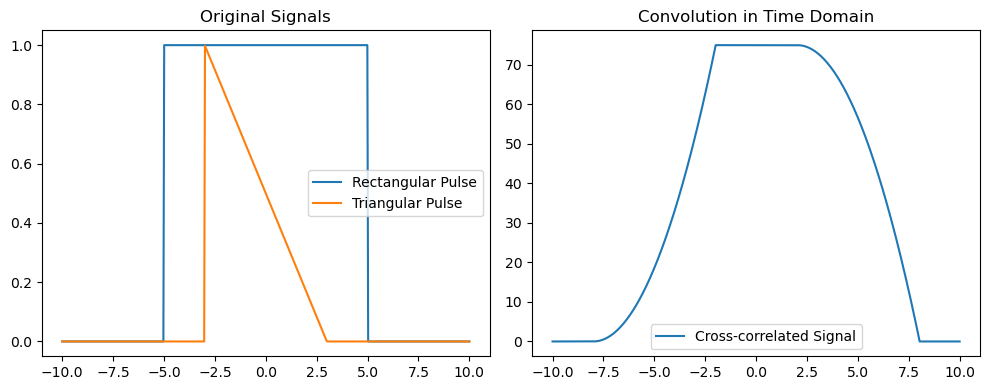

In [91]:
# Generate signals
t = np.linspace(-10, 10, 500)
rectangular_pulse = np.where((t >= -5) & (t <= 5), 1, 0)
triangular_pulse = np.where(t < -3, 0, 0.5 - t/6)
triangular_pulse = np.where(np.abs(t) <= 3, triangular_pulse, 0)

# Compute cross-correlation
cross_correlation = np.correlate(rectangular_pulse, triangular_pulse, 'same')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(t, rectangular_pulse, label='Rectangular Pulse')
plt.plot(t, triangular_pulse, label='Triangular Pulse')
plt.legend()
plt.title('Original Signals')

plt.subplot(1, 2, 2)
plt.plot(t, cross_correlation, label='Cross-correlated Signal')
plt.legend()
plt.title('Convolution in Time Domain')

plt.tight_layout()
plt.show()

- TODO: Add cross-corraltion in frequency domain

In [92]:
# Compute FFTs of the signals
F_rect = fft(rectangular_pulse)
F_tri = fft(triangular_pulse)

# Convolution in Frequency domain
multiplied_spectrum = None

if multiplied_spectrum is not None:
    # Convert back to time domain using IFFT
    convolved_freq = fftshift(ifft(multiplied_spectrum).real)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(t, rectangular_pulse, label='Rectangular Pulse')
    plt.plot(t, triangular_pulse, label='Triangular Pulse')
    plt.legend()
    plt.title('Original Signals')

    plt.subplot(1, 2, 2)
    plt.plot(t, convolved_freq, label='Cross-correlation (Frequency Domain)')
    plt.legend()
    plt.title('Convolution Result (IFFT)')

    plt.tight_layout()
    plt.show()